In [78]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [79]:
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

20.0

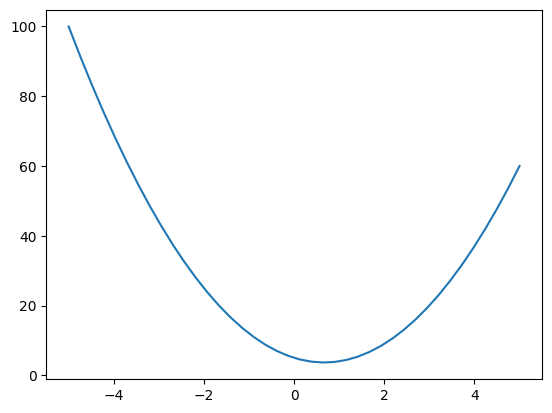

In [80]:
xs = np.linspace(-5, 5, 40).astype(float)
ys = f(xs)

plt.plot(xs, ys)

In [81]:
h = 1e-3
x = 3.0
(f(x + h) - f(x)) / h

14.00300000000243

In [82]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a * b + c
d

Value(data=4.0)

In [83]:
from graphviz import Digraph

def trace(root: Value):
    nodes, edges = set(), set()
    
    def build(v: Value):
        if v not in nodes:
            nodes.add(v)
            
            for child in v._prev:
                edges.add((child, v))
                build(child)
                
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={ 'rankdir': 'LR' })
    nodes, edges = trace(root)
    
    
    for node in nodes:
        uid = str(id(node))
        print(node)
        dot.node(name=uid, label=f"{node.data:.4f}", shape='record')
        if node._op:
            # this value was generated as a result of some operation, create an operation node
            
            dot.node(name=uid + node._op, label=node._op)
            dot.edge(uid + node._op, uid)
            
    for n1, n2 in edges:
        print("edge", n1, n2)
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

Value(data=-6.0)
Value(data=-3.0)
Value(data=2.0)
Value(data=4.0)
Value(data=10.0)
edge Value(data=-3.0) Value(data=-6.0)
edge Value(data=-6.0) Value(data=4.0)
edge Value(data=2.0) Value(data=-6.0)
edge Value(data=10.0) Value(data=4.0)


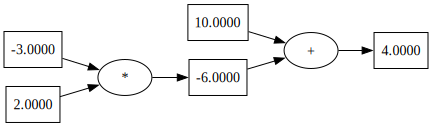

In [84]:
draw_dot(d)